<a href="https://colab.research.google.com/github/paramabhi/Course/blob/master/simple%20linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np 
import pandas as pd

import statsmodels
import statsmodels.api as sm




In [ ]:

import matplotlib.pyplot as pt
import seaborn as sn
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score




from sklearn.linear_model import LinearRegression

In [ ]:
adv=pd.read_csv('/content/gdrive/My Drive/advertising.csv')

In [ ]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
adv.size

800

In [ ]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

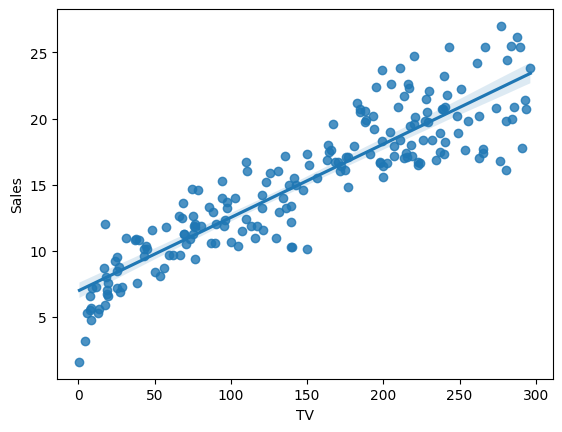

In [ ]:
sn.regplot(data=adv,x='TV',y='Sales')

<Axes: xlabel='Radio', ylabel='Sales'>

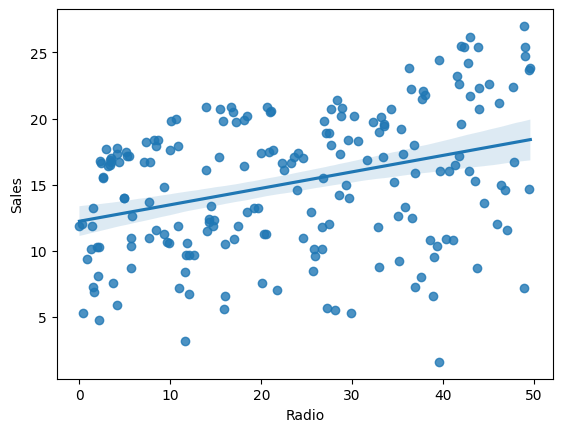

In [ ]:
sn.regplot(data=adv,x='Radio',y='Sales')

<Axes: xlabel='Newspaper', ylabel='Sales'>

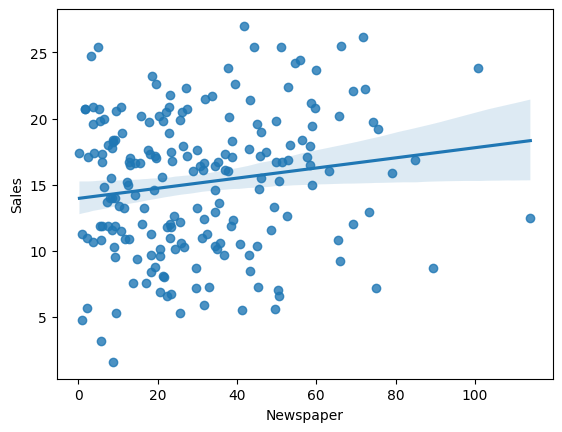

In [ ]:
sn.regplot(data=adv,x='Newspaper',y='Sales')

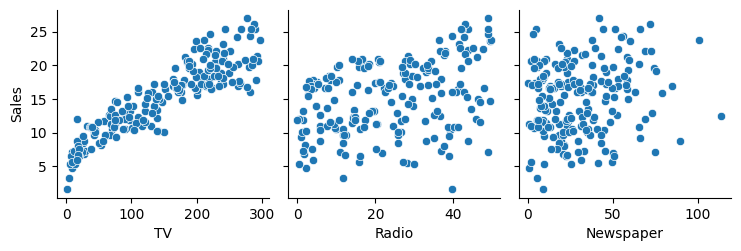

In [ ]:
sn.pairplot(x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],data=adv)

In [ ]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

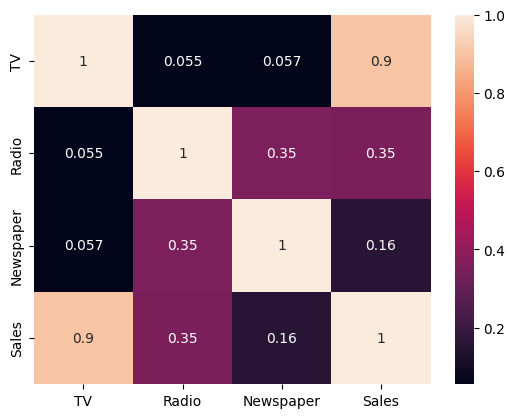

In [ ]:
sn.heatmap(adv.corr(),annot=True)

In [ ]:
X=adv['TV']
y=adv['Sales']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

In [ ]:
X_train.shape


(140,)

In [ ]:
#training the model
X_train_sm=sm.add_constant(X_train)

In [ ]:
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [ ]:
lr=sm.OLS(y_train,X_train_sm)

In [ ]:
lr_model=lr.fit()

In [ ]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 27 May 2023   Prob (F-statistic):           1.52e-52
Time:                        18:19:33   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

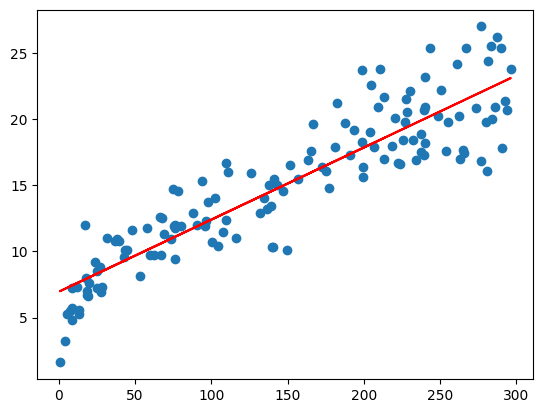

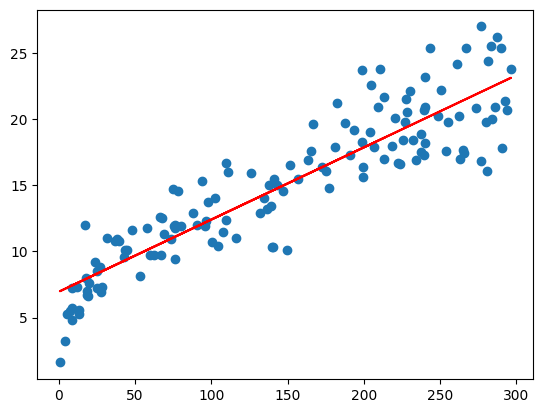

In [ ]:
#.coefficient and P value
#2.Rsquare values 81.6%
#3.F-statistics low so  fit is good and not bychance
pt.scatter(X_train,y_train)
pt.plot(X_train,6.9487+0.0545*X_train,'r')
pt.show()



#or
pt.scatter(X_train,y_train)
y_train_pred=lr_model.predict(X_train_sm)
pt.plot(X_train,y_train_pred,'r')
pt.show()

<ipython-input-25-5d8a0d572aa0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(residual)


Text(0.5, 1.0, 'residual plot')

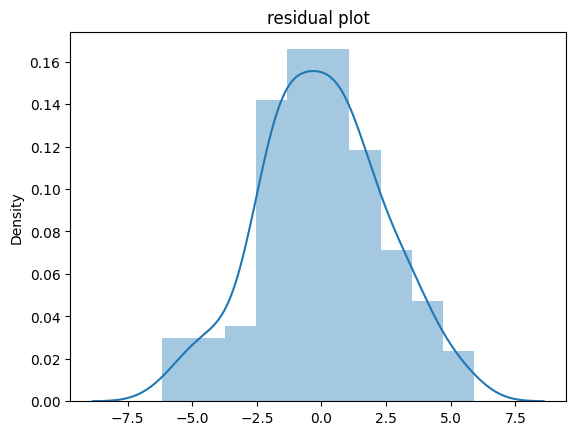

In [ ]:
##y_train-ypred=error
residual=y_train-y_train_pred
pt.figure()
sn.distplot(residual)
pt.title('residual plot')



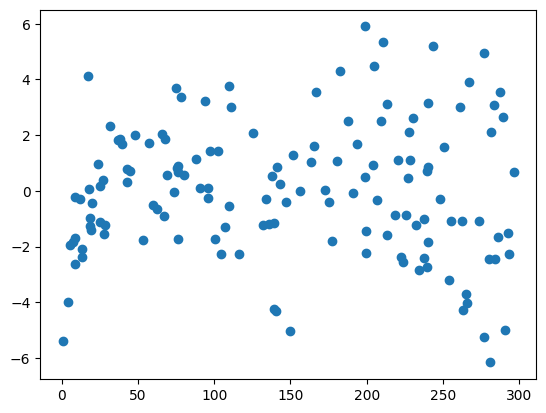

In [ ]:
pt.scatter(X_train,residual)
pt.show()
#its scatter around the 0 axis so tehere is no perticular pattern so what ever we have done is good

In [ ]:
X_test_sm=sm.add_constant(X_test)
y_test_pred=lr_model.predict(X_test_sm)

In [ ]:
r2=r2_score(y_true=y_test,y_pred=y_test_pred)

In [ ]:
r2
#so its 79 percent almost same as 81 percent earlier

0.792103160124566

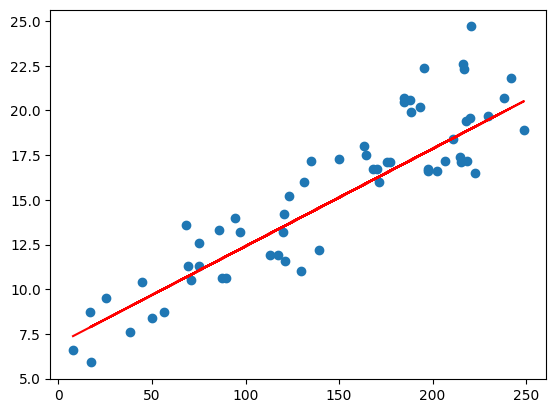

In [ ]:
pt.scatter(X_test,y_test)
pt.plot(X_test,y_test_pred,'r')
pt.show()

In [ ]:
X_train.shape

(140,)

In [ ]:
#reshape
X_train_shape=X_train.values.reshape(-1,1)
#reshape
X_test_shape=X_test.values.reshape(-1,1)

#dont do anything to  rows so given -1 

X_train_shape.shape

(140, 1)

In [ ]:
##Using sklearn package:


#1.create object

lm=LinearRegression()
#2.fit the model
lm.fit(X_train_shape,y_train)



AttributeError: ignored

In [ ]:
#help(lm)

In [ ]:
#3.see the model parameters
print(lm.coef_)
print(lm.intercept_)


[0.05454575]
6.948683200001357


In [ ]:
#4.predict models


y_test_pred_sk=lm.predict(X_test_shape)
y_train_pred_sk=lm.predict(X_train_shape)


In [ ]:
#5.evaluate
r2_score(y_true=y_train,y_pred=y_train_pred_sk)

0.8157933136480389

In [ ]:
r2_score(y_true=y_test,y_pred=y_test_pred_sk)

0.7921031601245662